In [2]:
import numpy as np
import sympy as sp 
from sympy import *

In [7]:
x= Symbol("x")
y= Symbol("y")

In [8]:
init_printing()

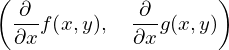

In [42]:
f, g, h = symbols('f g h', cls=Function)
f,g=f(x,y),g(x,y)
diff(f,x),diff(g,x)

Verifions notre formule dans le lemme 1:

In [21]:
i=complex(0,1)

In [22]:
i**2

(-1+0j)

In [168]:
P = (f+i*g)*(x+i*y) + (f-i*g)*(x-i*y)
H = -i*(f+i*g)*(x+i*y) +i*(f-i*g)*(x-i*y)

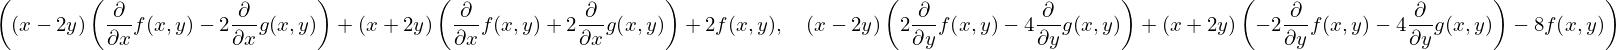

In [169]:
diff(P,x), diff(H,y)

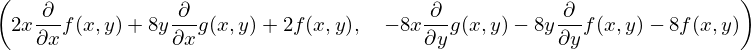

In [170]:
a,b=simplify(diff(P,x)),simplify(diff(H,y))
a,b

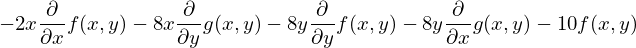

In [171]:
-a+b 

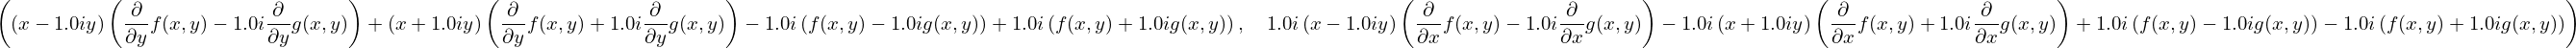

In [57]:
diff(P,y), diff(H,x)

In [59]:
a,b=simplify(diff(P,y)), simplify(diff(H,x))

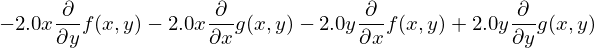

In [61]:
-a-b 

malheureusement, je ne recois pas le resultat comme dans l'article. 

je vais maintenant essayer de trouver le potentiel et hamiltonien par la formule dans la proposition 1 de l'article pour le système suivant: 
x' = x^4 +y^4 et y' = x^4 +y^4

In [72]:
integrate(integrate(sin(x),x),x) # j'essaie de manipuler un peu la bibliotheque 

In [126]:
def Integrer(fonc,x,n):                   #integrer une fonction par rapport a une variable x ou y n fois
    I=fonc
    i=0
    while i<n:
        I = integrate(I,x)
        i = i+1
    return I
def Deriver(fonc,x,n):                    #deriver une fonction par rapport a une variable n fois.
    D = fonc
    i = 0 
    while i<n:
        D = diff(D,x)
        i=i+1
    return D

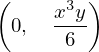

In [160]:
Deriver(x*y,y,2), Integrer(x*y,x,2) 

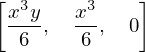

In [158]:
[Deriver(Integrer(x*y,x,2),y,i) for i in range(3)]

In [148]:
# j'implemente le potentielle et Hamiltonien dans la proposition 1 
# je fixe k=4 comme dans l'article. 
def Potentielle(f1,f2,g1,g2):   #avec f1,g1, f2,g2 sont des fonctions dans le second membre du systeme differentielle
    P1,P2,P3,P4 =0,0,0,0
    for j in range(1,4+1):   #j ne peut pas etre =0 
        if j%4 == 1: 
            P1 = P1 + -Deriver(Integrer(f1,x,j),y,j-1) - Deriver(Integrer(g1,y,j),x,j-1)  
        if j%4 == 2:
            P2 = P2 + -Deriver(Integrer(f2,y,j),x,j-1) - Deriver(Integrer(g2,y,j),x,j-1)
        if j%4 == 3:
            P3 = P3 + Deriver(Integrer(f1,x,j),y,j-1) + Deriver(Integrer(g1,y,j),x,j-1)
        if j%4 == 0:
            P4 = P4 + Deriver(Integrer(f2,y,j),x,j-1) - Deriver(Integrer(g2,y,j),x,j-1)
    return P1+P2+P3+P4 

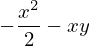

In [162]:
P = Potentielle(x,y,x,y)
P

In [150]:
def Hamiltonien(f1,f2,g1,g2):
    H1,H2,H3,H4 =0,0,0,0
    for j in range(1,5):
        if j%4 == 1: 
            H1 = H1 + -Deriver(Integrer(g2,x,j),y,j-1) + Deriver(Integrer(f2,y,j),x,j-1)  
        if j%4 == 2:
            H2 = H2 + Deriver(Integrer(f1,y,j),x,j-1) - Deriver(Integrer(g1,y,j),x,j-1)
        if j%4 == 3:
            H3 = H3 + Deriver(Integrer(g2,x,j),y,j-1) - Deriver(Integrer(f2,y,j),x,j-1)
        if j%4 == 0:
            H4 = H4 + -Deriver(Integrer(f1,y,j),x,j-1) + Deriver(Integrer(g1,y,j),x,j-1)
    return H1+H2+H3+H4 

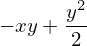

In [161]:
H = Hamiltonien(x,y,x,y)
H

In [166]:
-diff(P,x)-diff(H,y)

Peut-etre une autre exemple [lorentz pendulum dans l'article 1 page 2 ] 
x'=y  et y' = -ax - x^3 
je choisis en particulier f1 = g2 = 0; f2 = y; g1 = -ax -x^3 

In [153]:
Potentielle(0,y,-x-x**3,0)

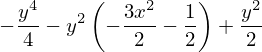

In [154]:
Hamiltonien(0,y,-x-x**3,0)

In [155]:
-diff(Potentielle(0,y,-x-x**3,0),x)+diff(Potentielle(0,y,-x-x**3,0),y)